In [1]:
# importing data
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# importing dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

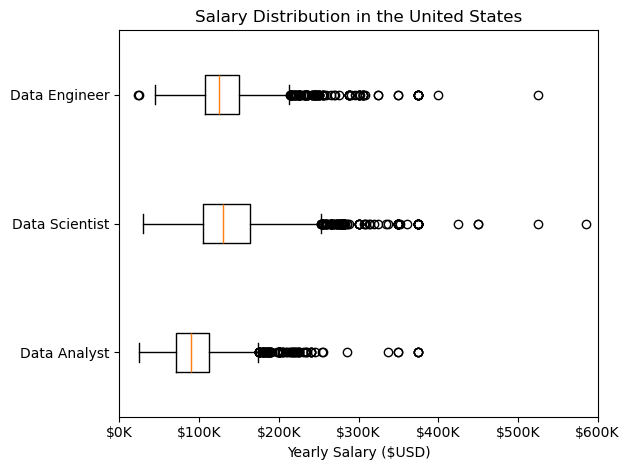

In [9]:
job_titles = ["Data Analyst", "Data Scientist", "Data Engineer"]
dfj = df[(df["job_title_short"].isin(job_titles)) & (df["job_country"] == "United States")]
dfj = dfj.dropna(subset = "salary_year_avg")
job_list = [dfj[dfj["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles]
plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title("Salary Distribution in the United States")
plt.xlabel("Yearly Salary ($USD)")
plt.xlim(0,600_000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K" ))
plt.tight_layout()
plt.show()